# BÀI THỰC HÀNH 2: MẠNG NEURAL TÍCH CHẬP

<b>Hướng dẫn nộp bài:</b> Các bạn commit và push code lên github, sử dụng file txt đặt tên theo cú pháp <MSSV>.txt chứa đường link dẫn đến github của bài thực hành và nộp file txt này tên courses.

Bộ dữ liệu sử dụng: [MNIST dataset](https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/) (bài 1) và [VinaFood21 dataset](https://arxiv.org/abs/2108.02929) (các bài còn lại).

Link download: https://drive.google.com/file/d/1UpZOf0XlwvB4rKpyZ35iwTA8oWHqDBbR/view?usp=share_link.

### Bài 2: Xây dựng mô hình GoogLeNet. Huấn luyện và đánh giá mô hình GoogLeNet trên 4 độ đo precision, recall và F1 (sử dụng Adam làm optimizer). Lưu ý lớp Convolution đầu tiên có padding là 3, các lớp Max Pooling đều bật chế độ ceil_mode (`ceil_mode=True`).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import os
os.chdir('/content/drive/MyDrive/Uni/Ki-5-Nam-3/DS201/Lab-2/bai-2-den-4/bai-2-modules')

In [16]:
os.getcwd()

'/content/drive/MyDrive/Uni/Ki-5-Nam-3/DS201/Lab-2/bai-2-den-4/bai-2-modules'

Khám phá dữ liệu:
Số lớp: 21
Số ảnh train/test: 10044/6682
Ví dụ nhãn: ['banh-can', 'banh-hoi', 'banh-mi-chao', 'banh-tet', 'banh-trang-tron']


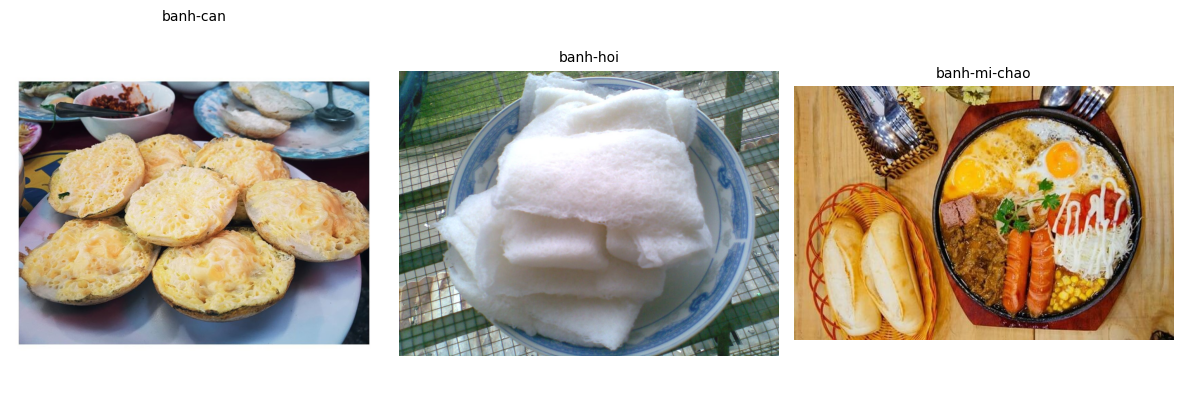

<Figure size 640x480 with 0 Axes>

In [ ]:
%run explore.py

In [12]:
shutil.rmtree("/content/vinafood21")

In [13]:
import shutil
import os

source = "/content/drive/My Drive/Uni/Ki-5-Nam-3/DS201/Lab-2/bai-2-den-4/vinafood21"
dest = "/content/vinafood21"

if not os.path.exists(dest):
    print("Đang copy dataset vào local...")
    shutil.copytree(source, dest)
    print("Hoàn thành")
else:
    print("Dataset đã có trong dường dẫn")

Đang copy dataset vào local...
Hoàn thành


In [22]:
%run check_config.py

1. Kiểm tra CUDA:
   CUDA available: True
   Device: Tesla T4
   Memory: 15.8 GB

2. Đang load dataset...
   ✓ Load thành công trong 0.03s
   Số lớp: 21
   Train batches: 314
   Test batches: 209
   Train samples: 10044
   Test samples: 6682

3. Test tốc độ load 1 batch:
   ✓ Load 1 batch trong 0.723s
   Batch shape: torch.Size([32, 3, 224, 224])

4. Test forward pass trên GPU:
   ✓ Forward pass trong 0.005s
   Output shape: torch.Size([32, 21])

   Phân tích thời gian/batch:
   - Load data: 0.723s
   - GPU (forward+backward): 0.016s
   - Tổng: 0.739s/batch

   Ước tính thời gian 1 epoch train: 232.2s (~3.9 phút)


In [ ]:
%run main.py --data_dir /content/vinafood21 --epochs 5

Thiết bị: cuda
------------------------------------------------------------


Epoch 1/5 [Train]:  60%|█████▉    | 187/314 [02:02<01:36,  1.32it/s, loss=2.9921]/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 1/5 [Train]: 100%|██████████| 314/314 [03:24<00:00,  1.54it/s, loss=2.9503]


Train - loss: 2.9852 | acc: 0.0885 | P/R/F1: 0.0209/0.0481/0.0165


Epoch 1/5 [Test]: 100%|██████████| 209/209 [02:00<00:00,  1.74it/s, loss=2.7908]


Test  - loss: 2.9905 | acc: 0.0838 | P/R/F1: 0.0040/0.0476/0.0074
------------------------------------------------------------


Epoch 2/5 [Train]: 100%|██████████| 314/314 [03:13<00:00,  1.62it/s, loss=3.0137]


Train - loss: 2.9807 | acc: 0.0872 | P/R/F1: 0.0080/0.0465/0.0129


Epoch 2/5 [Test]: 100%|██████████| 209/209 [02:00<00:00,  1.74it/s, loss=3.1020]


Test  - loss: 2.9772 | acc: 0.0908 | P/R/F1: 0.0043/0.0476/0.0079
------------------------------------------------------------


Epoch 3/5 [Train]: 100%|██████████| 314/314 [03:12<00:00,  1.63it/s, loss=2.9725]


Train - loss: 2.9800 | acc: 0.0909 | P/R/F1: 0.0085/0.0483/0.0131


Epoch 3/5 [Test]: 100%|██████████| 209/209 [01:59<00:00,  1.75it/s, loss=3.0466]


Test  - loss: 2.9758 | acc: 0.0908 | P/R/F1: 0.0043/0.0476/0.0079
------------------------------------------------------------


Epoch 4/5 [Train]: 100%|██████████| 314/314 [03:12<00:00,  1.63it/s, loss=3.1257]


Train - loss: 2.9782 | acc: 0.0880 | P/R/F1: 0.0076/0.0465/0.0113


Epoch 4/5 [Test]: 100%|██████████| 209/209 [01:58<00:00,  1.77it/s, loss=3.0599]


Test  - loss: 2.9758 | acc: 0.0838 | P/R/F1: 0.0040/0.0476/0.0074
------------------------------------------------------------


Epoch 5/5 [Train]: 100%|██████████| 314/314 [03:11<00:00,  1.64it/s, loss=3.0238]


Train - loss: 2.9785 | acc: 0.0880 | P/R/F1: 0.0083/0.0474/0.0139


Epoch 5/5 [Test]: 100%|██████████| 209/209 [01:59<00:00,  1.75it/s, loss=2.9767]

Test  - loss: 2.9759 | acc: 0.0908 | P/R/F1: 0.0043/0.0476/0.0079
Kết quả cuối cùng (macro):
Precision: 0.0043 | Recall: 0.0476 | F1: 0.0079


### Bài 3: Xây dựng mô hình ResNet-18, đánh giá mô hình ResNet-18 trên bộ dữ liệu VinaFood21 sử dụng các độ đo precision, recall, và F1 (Sử dụng Adam làm optimizer). Lưu ý, giữa các block Residual-Connection có một lớp Max Pooling (kernel = 3, stride = 2, paddding = 0)

In [24]:
os.chdir("/content/drive/MyDrive/Uni/Ki-5-Nam-3/DS201/Lab-2/bai-2-den-4/bai-3-modules")

Số lớp: 21
Train samples: 10044
Test samples: 6682
Device: cuda
------------------------------------------------------------


Epoch 1/5 [Train]:  90%|█████████ | 283/314 [02:55<00:18,  1.71it/s, loss=2.2507]/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 1/5 [Train]: 100%|██████████| 314/314 [03:14<00:00,  1.62it/s, loss=2.2278]


Train - loss: 2.5357 | acc: 0.2386 | P/R/F1: 0.2119/0.2062/0.1967


Epoch 1/5 [Test]: 100%|██████████| 209/209 [01:57<00:00,  1.79it/s, loss=2.0386]


Test  - loss: 2.3662 | acc: 0.2845 | P/R/F1: 0.3032/0.2393/0.2168
------------------------------------------------------------


Epoch 2/5 [Train]: 100%|██████████| 314/314 [02:59<00:00,  1.75it/s, loss=1.8037]


Train - loss: 2.1222 | acc: 0.3401 | P/R/F1: 0.3085/0.3083/0.3001


Epoch 2/5 [Test]: 100%|██████████| 209/209 [01:49<00:00,  1.90it/s, loss=2.6478]


Test  - loss: 2.1894 | acc: 0.3292 | P/R/F1: 0.3777/0.2897/0.2715
------------------------------------------------------------


Epoch 3/5 [Train]: 100%|██████████| 314/314 [02:59<00:00,  1.75it/s, loss=1.5998]


Train - loss: 1.8600 | acc: 0.4228 | P/R/F1: 0.4008/0.3926/0.3909


Epoch 3/5 [Test]: 100%|██████████| 209/209 [01:51<00:00,  1.87it/s, loss=2.2378]


Test  - loss: 2.0513 | acc: 0.3750 | P/R/F1: 0.4197/0.3493/0.3591
------------------------------------------------------------


Epoch 4/5 [Train]: 100%|██████████| 314/314 [02:58<00:00,  1.76it/s, loss=1.1333]


Train - loss: 1.6591 | acc: 0.4838 | P/R/F1: 0.4653/0.4564/0.4566


Epoch 4/5 [Test]: 100%|██████████| 209/209 [01:49<00:00,  1.92it/s, loss=2.9174]


Test  - loss: 1.9883 | acc: 0.3991 | P/R/F1: 0.4705/0.3940/0.3674
------------------------------------------------------------


Epoch 5/5 [Train]: 100%|██████████| 314/314 [02:59<00:00,  1.75it/s, loss=1.4148]


Train - loss: 1.5075 | acc: 0.5219 | P/R/F1: 0.5080/0.4974/0.4997


Epoch 5/5 [Test]: 100%|██████████| 209/209 [01:50<00:00,  1.89it/s, loss=1.6099]


Test  - loss: 1.8201 | acc: 0.4412 | P/R/F1: 0.4861/0.4309/0.4179
Kết quả cuối cùng (macro):
Precision: 0.4861 | Recall: 0.4309 | F1: 0.4179

Vẽ biểu đồ training history...


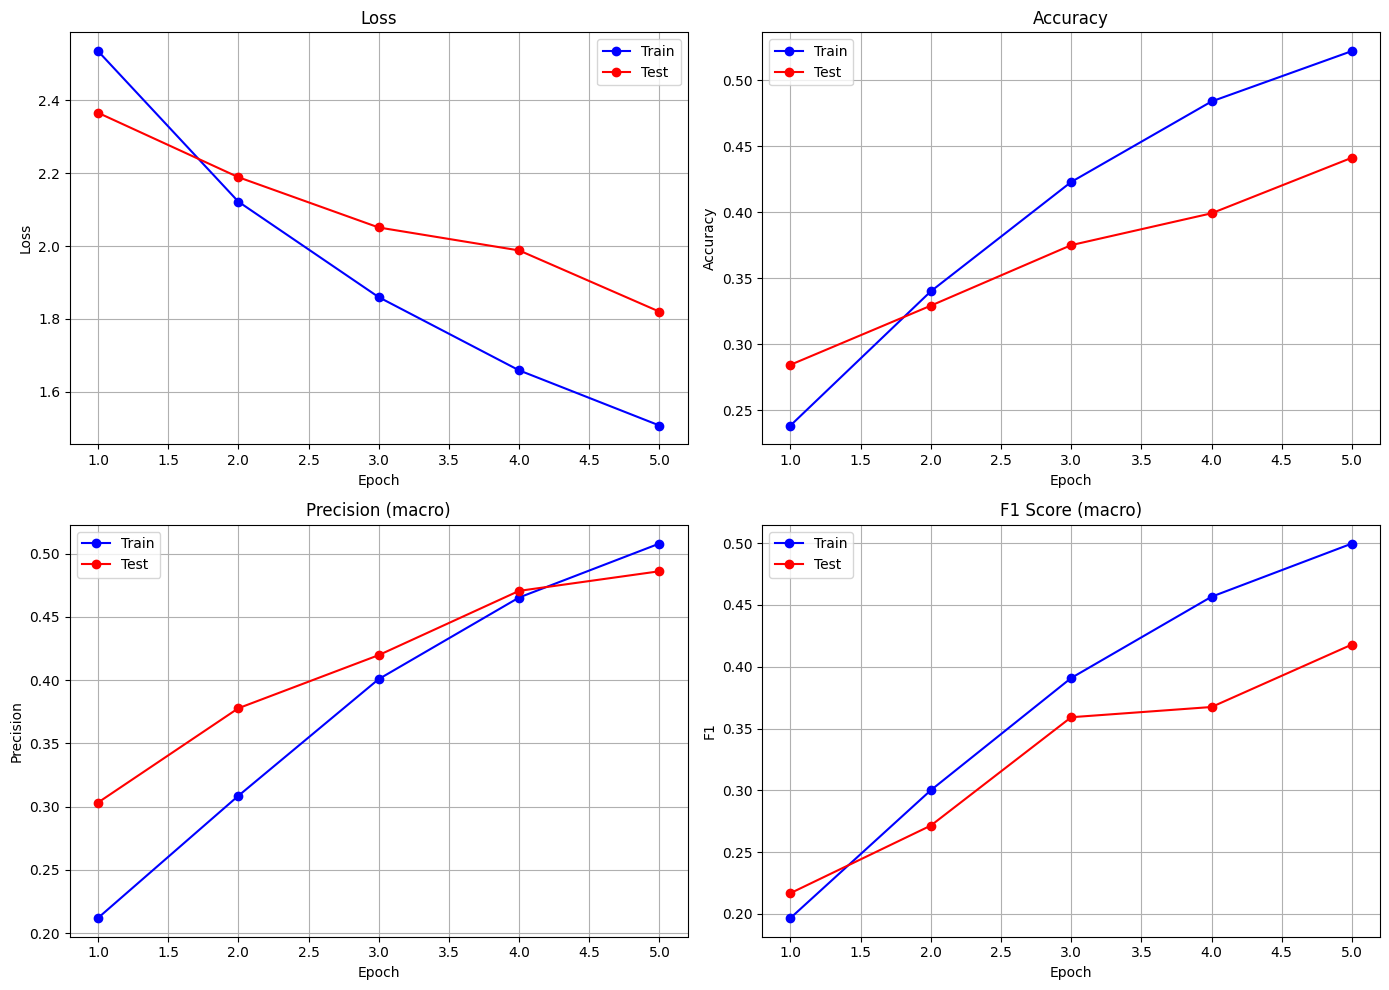


Hiển thị mẫu dự đoán...


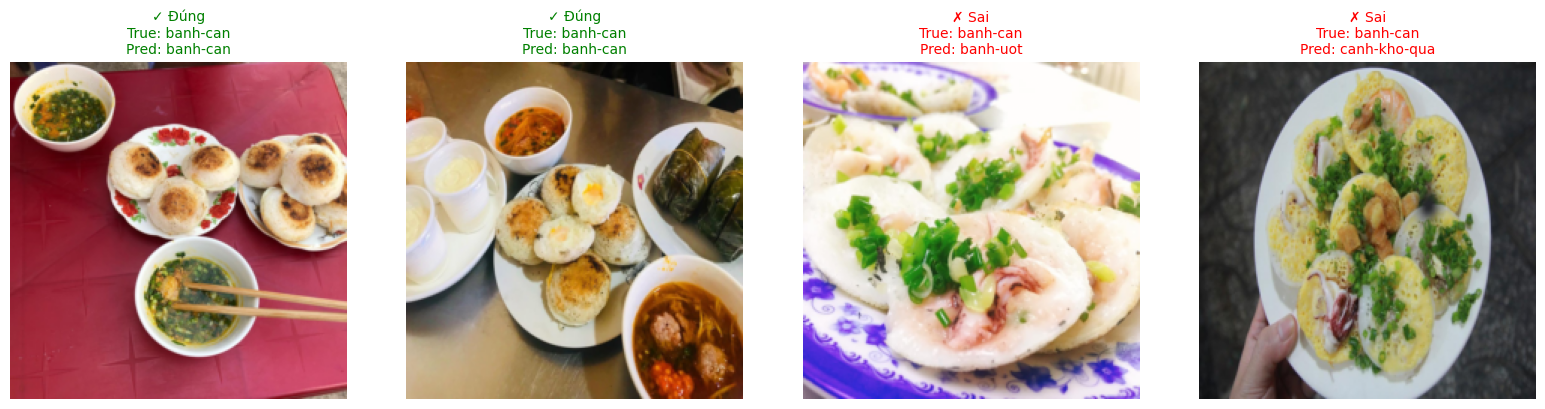

<Figure size 640x480 with 0 Axes>

In [27]:
%run main.py

### Bài 4: Sử dụng pretrained ResNet50 từ HuggingFace để fine-tune trên bộ dữ liệu VinaFood21.

In [35]:
os.chdir("/content/drive/MyDrive/Uni/Ki-5-Nam-3/DS201/Lab-2/bai-2-den-4/bai-4-modules")

Fine-tuning Pretrained ResNet50 từ HuggingFace
Số lớp: 21
Train samples: 10044
Test samples: 6682
Learning rate: 0.0001
Device: cuda
------------------------------------------------------------


Epoch 1/5 [Train]:   5%|▌         | 17/314 [00:13<03:37,  1.37it/s, loss=3.0135]/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Epoch 1/5 [Train]: 100%|██████████| 314/314 [04:08<00:00,  1.26it/s, loss=1.9502]


Train - loss: 2.6318 | acc: 0.2434 | P/R/F1: 0.3461/0.1764/0.1714


Epoch 1/5 [Test]: 100%|██████████| 209/209 [02:01<00:00,  1.72it/s, loss=1.9436]


Test  - loss: 2.0059 | acc: 0.4954 | P/R/F1: 0.6184/0.4288/0.4273
------------------------------------------------------------


Epoch 2/5 [Train]: 100%|██████████| 314/314 [04:07<00:00,  1.27it/s, loss=0.9107]


Train - loss: 1.3368 | acc: 0.6589 | P/R/F1: 0.6962/0.6161/0.6264


Epoch 2/5 [Test]: 100%|██████████| 209/209 [02:04<00:00,  1.68it/s, loss=0.6519]


Test  - loss: 0.9540 | acc: 0.7314 | P/R/F1: 0.7466/0.7185/0.7171
------------------------------------------------------------


Epoch 3/5 [Train]: 100%|██████████| 314/314 [04:07<00:00,  1.27it/s, loss=0.6956]


Train - loss: 0.7028 | acc: 0.7953 | P/R/F1: 0.7934/0.7800/0.7778


Epoch 3/5 [Test]: 100%|██████████| 209/209 [02:02<00:00,  1.71it/s, loss=0.5604]


Test  - loss: 0.7167 | acc: 0.7808 | P/R/F1: 0.7827/0.7740/0.7687
------------------------------------------------------------


Epoch 4/5 [Train]: 100%|██████████| 314/314 [04:07<00:00,  1.27it/s, loss=0.3610]


Train - loss: 0.4850 | acc: 0.8551 | P/R/F1: 0.8521/0.8430/0.8419


Epoch 4/5 [Test]: 100%|██████████| 209/209 [02:01<00:00,  1.71it/s, loss=0.4387]


Test  - loss: 0.6073 | acc: 0.8170 | P/R/F1: 0.8131/0.8143/0.8100
------------------------------------------------------------


Epoch 5/5 [Train]: 100%|██████████| 314/314 [04:07<00:00,  1.27it/s, loss=0.3055]


Train - loss: 0.3436 | acc: 0.8979 | P/R/F1: 0.8974/0.8885/0.8899


Epoch 5/5 [Test]: 100%|██████████| 209/209 [02:01<00:00,  1.73it/s, loss=0.4273]


Test  - loss: 0.5628 | acc: 0.8252 | P/R/F1: 0.8250/0.8241/0.8227

Kết quả cuối cùng (macro):
Precision: 0.8250 | Recall: 0.8241 | F1: 0.8227

Vẽ biểu đồ training history...


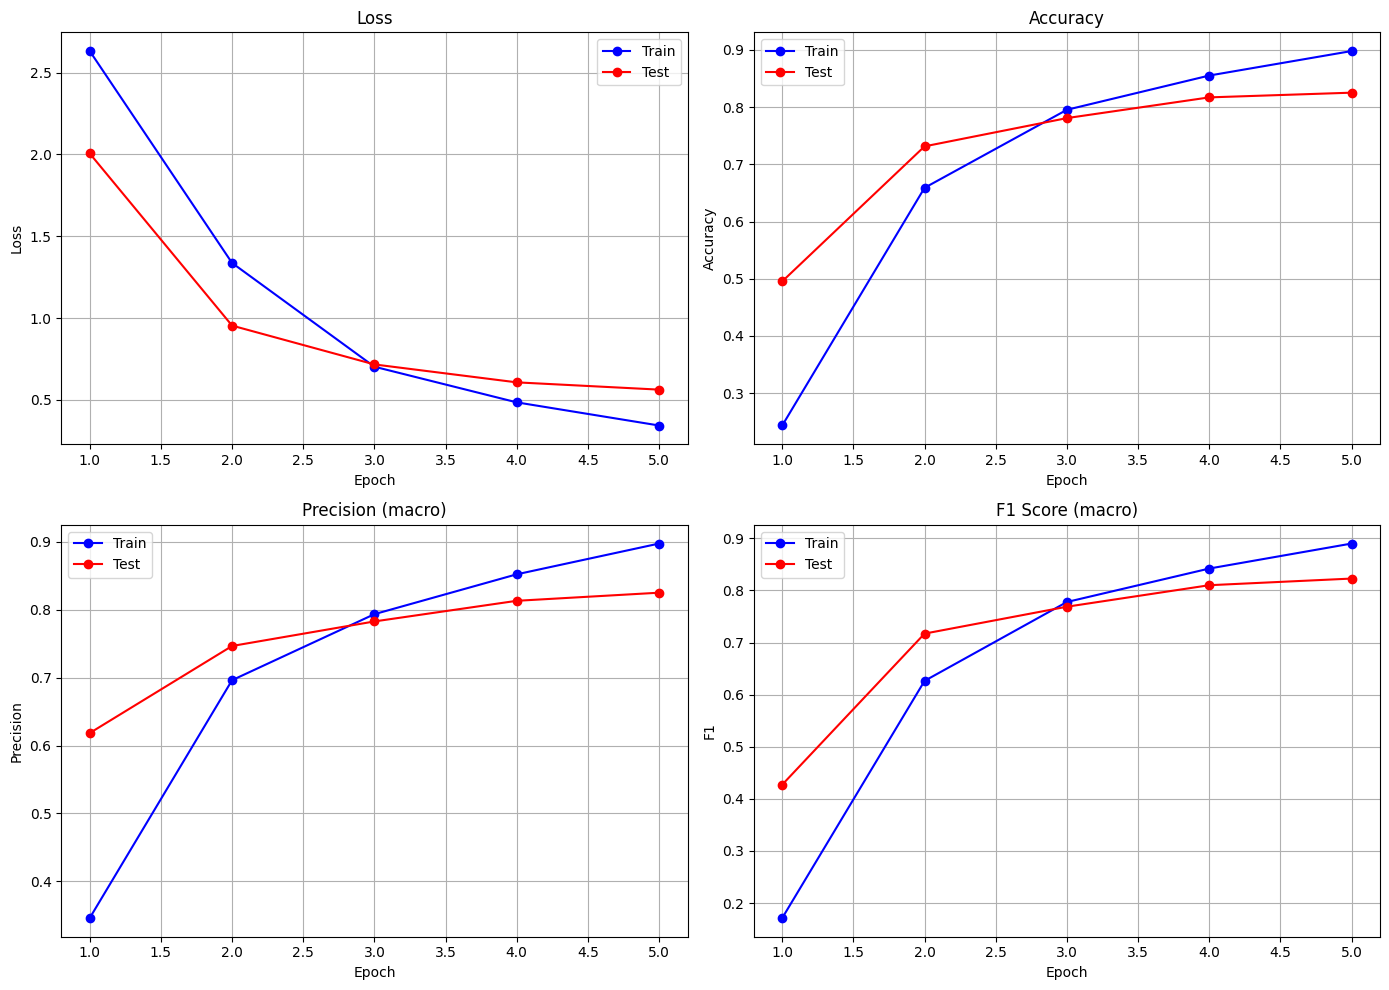


Hiển thị mẫu dự đoán...


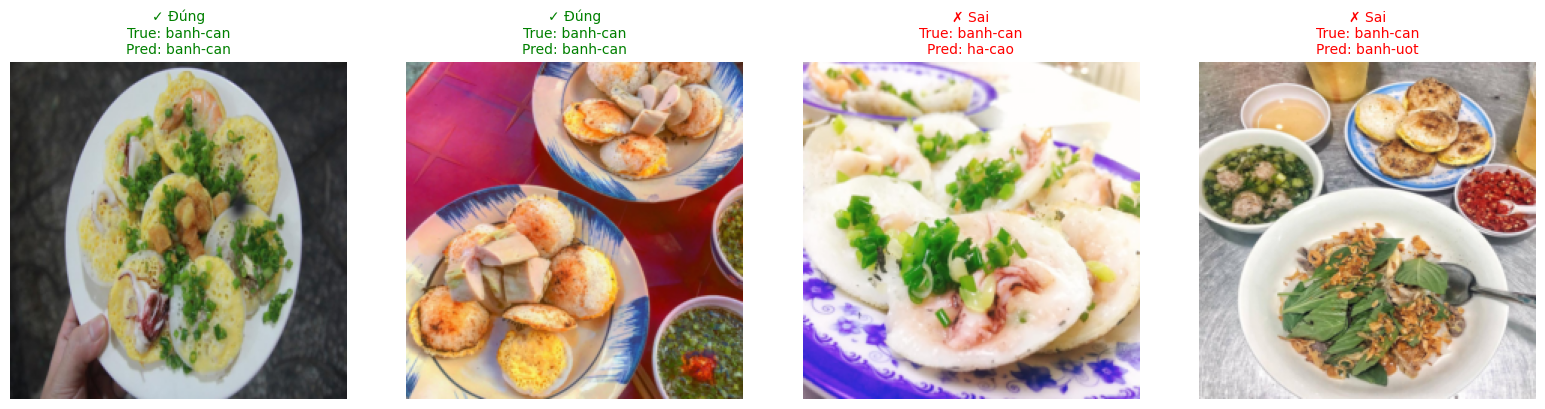

<Figure size 640x480 with 0 Axes>

In [36]:
%run main.py